In [7]:
import aerosandbox as asb
import aerosandbox.numpy as np

### Generate data
@np.vectorize
def get_arc_length(s=2, N=500000):
    theta = np.linspace(0, np.pi / 2, N)
    st = np.sin(theta)
    ct = np.cos(theta)

    ct[-1] = 0
    st[0] = 0

    x = ct ** (2/s)
    y = st ** (2/s)

    dx = np.diff(x)
    dy = np.diff(y)

    darc = (dx ** 2 + dy ** 2) ** 0.5

    arc_length = np.sum(darc)

    return arc_length

s = np.concatenate([
    np.linspace(1e-6, 3, 200),
    np.linspace(3, 50, 100)[1:]
])
arc_lengths = get_arc_length(s)

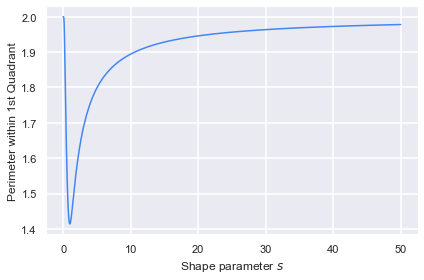

In [8]:
import matplotlib.pyplot as plt
import aerosandbox.tools.pretty_plots as p

fig, ax = plt.subplots()
plt.plot(s, arc_lengths)
p.show_plot("", "Shape parameter $s$", "Perimeter within 1st Quadrant")

In [10]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=1000000,  # < Increase me for better results
    population_size=50,
    ncyclesperiteration=700,
    binary_operators=[
        "*",
        "+",
        "pow"
    ],
    unary_operators=[
        # "cos",
        # "exp",
        # "sin",
        # "tan",
        # "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    complexity_of_operators={
        "*"  : 1,
        "+"  : 1,
        "pow": 1,
        # "exp": 2,
        # "cos": 3,
        # "sin": 3,
        # "tan": 5,
    },
    # complexity_of_constants=0.5,
    complexity_of_variables=2,
    constraints={
        'pow': (-1, 5),
        # 'sin': 5,
        # 'cos': 5,
        # 'tan': 5,
    },
    maxsize=30,
    # batching=True,
    # batch_size=500,
    # warm_start=True,
    # extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    # loss="loss(prediction, target, weight) = weight * abs(prediction - target)",
    # ^ Custom loss function (julia syntax)
)

model.fit(
    s.reshape((-1, 1)), arc_lengths,
    # weights=weights,
    # variable_names=list(x_data.keys())
)

ModuleNotFoundError: No module named 'pysr'